In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf
from google.colab import files
from IPython.display import Image, display

In [ ]:
model = tf.keras.models.load_model('/content/Fractured_bone_detection.h5')

In [ ]:
def preprocess_image(image):

    image = cv2.resize(image, (224, 224))
    image = image / 255.0
    return np.expand_dims(image, axis=0)

Saving 4-rotated3-rotated1.jpg to 4-rotated3-rotated1 (1).jpg
1/1 [==============================] - 0s 24ms/step
[0.6010304]


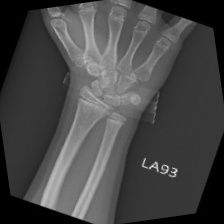

Predicted Class: 0
Confidence Score: 0.60
Prediction: Fractured


In [ ]:
uploaded = files.upload()

for filename in uploaded.keys():
    img = cv2.imread(filename)
    preprocessed_image = preprocess_image(img)
    prediction = model.predict(preprocessed_image)[0]

    print(prediction)
    pred_class = np.argmax(prediction)
    confidence_score = prediction[pred_class]

    display(Image(filename=filename))
    print(f'Predicted Class: {pred_class}')
    print(f'Confidence Score: {confidence_score:.2f}')

    # Determine result based on a threshold
    threshold = 0.502
    if confidence_score <= threshold:
        result = "Not Fractured"
    else:
        result = "Fractured"

    print(f"Prediction: {result}")